In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap


In [7]:
# Load dataset
df = pd.read_csv('/Users/mac/Downloads/dataset_traffic_accident_prediction1.csv')


In [8]:
# Display details 
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [9]:
# Display details afet data cleaning
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
6,Foggy,Highway,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Truck,27.0,26.0,Daylight,1.0
7,Rainy,City Road,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Car,29.0,22.0,Artificial Light,1.0


In [10]:
# Display missing values per column
null_counts = df.isnull().sum()
# Filter and display only columns with missing values
null_counts[null_counts > 0].sort_values(ascending=False)



Series([], dtype: int64)

In [11]:
# clean categorical values
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.title()

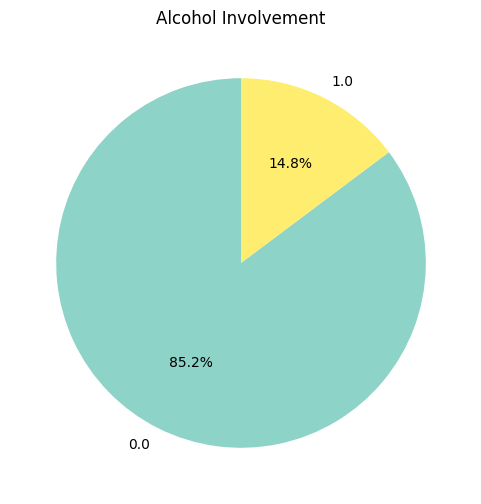

In [12]:
# Alcoholic driving analysis using Pie Chart
df['Driver_Alcohol'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', figsize=(6,6))
plt.title('Alcohol Involvement')
plt.ylabel('')
plt.show()

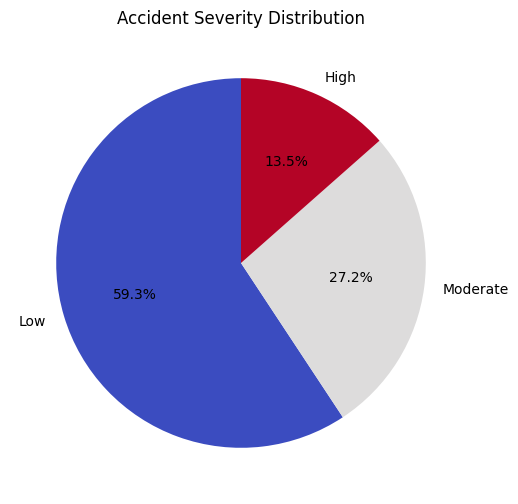

In [13]:
# Accident Severity analysis using Pie Chart
df['Accident_Severity'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(6,6))
plt.title('Accident Severity Distribution')
plt.ylabel('')
plt.show()

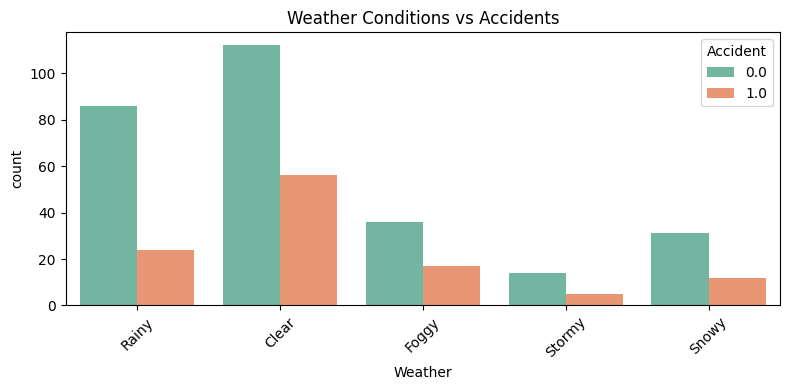

In [14]:
# categorical data visualization using bar chart
# Bar Plot: Weather vs Accident
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Weather', hue='Accident', palette='Set2')
plt.title('Weather Conditions vs Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



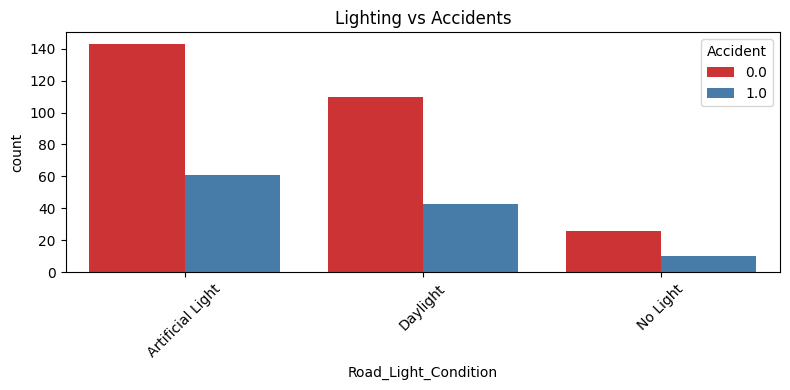

In [15]:
# Bar Plot: Road Light Condition
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Road_Light_Condition', hue='Accident', palette='Set1')
plt.title('Lighting vs Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

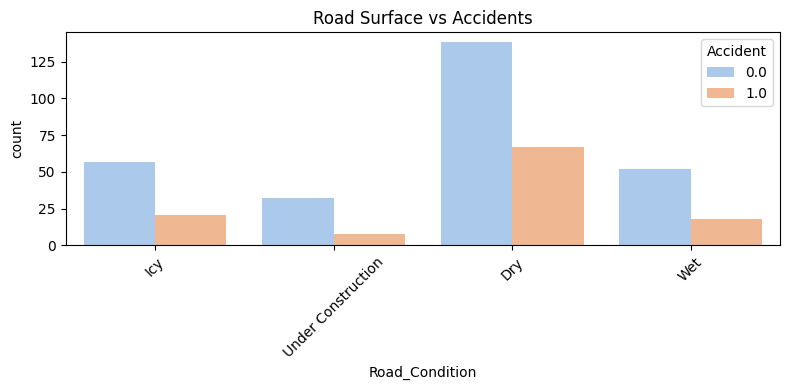

In [16]:
# Bar Plot: Road Condition
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Road_Condition', hue='Accident', palette='pastel')
plt.title('Road Surface vs Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

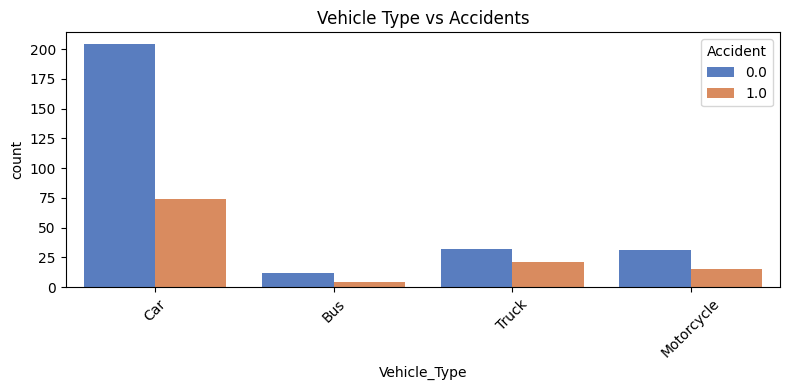

In [17]:
# Bar Plot: Vehicle Type
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Vehicle_Type', hue='Accident', palette='muted')
plt.title('Vehicle Type vs Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

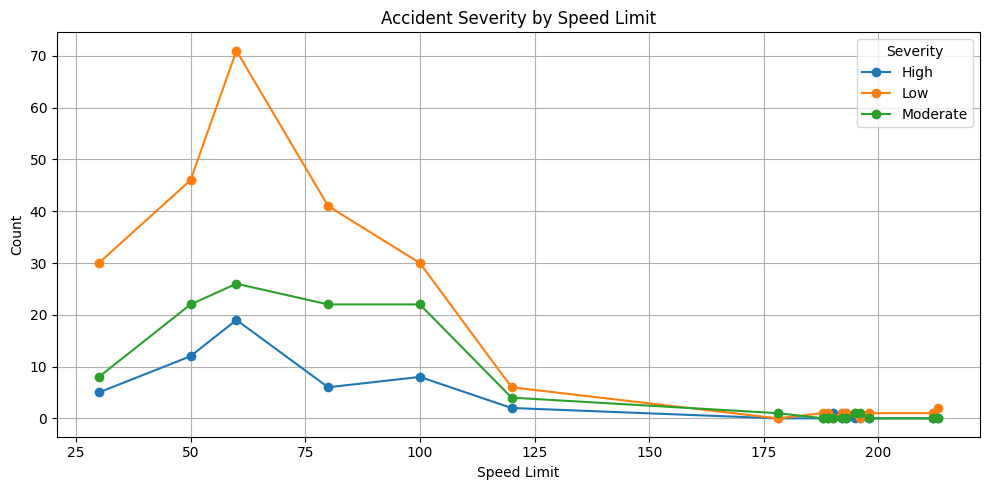

In [18]:
# Line Plot showing the rate of severity with increase in speed limit
severity_speed = df.groupby('Speed_Limit')['Accident_Severity'].value_counts().unstack().fillna(0)
severity_speed.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Accident Severity by Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

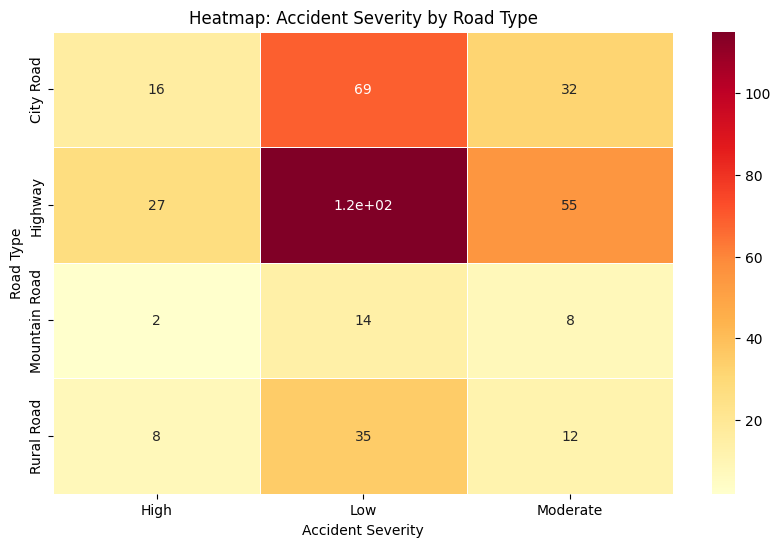

In [19]:
# Heatmap of Road Type vs Severity
road_severity = df.pivot_table(index='Road_Type', columns='Accident_Severity', aggfunc='size', fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(road_severity, annot=True, cmap='YlOrRd', linewidths=.5)
plt.title('Heatmap: Accident Severity by Road Type')
plt.xlabel('Accident Severity')
plt.ylabel('Road Type')
plt.show()

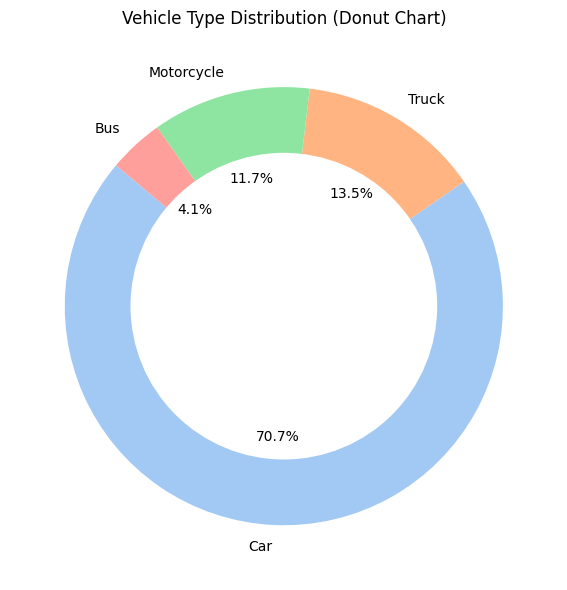

In [20]:
vehicle_counts = df['Vehicle_Type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Vehicle Type Distribution (Donut Chart)')
plt.tight_layout()
plt.show()

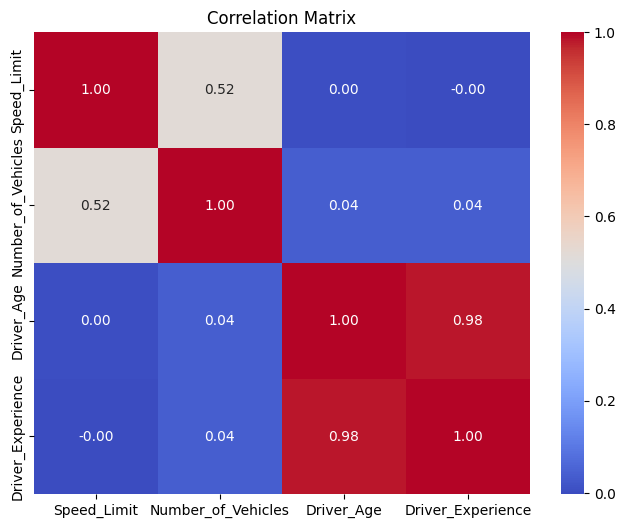

In [21]:
# Correalation matrix
num_cols = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()